# AQF - Explore Date

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime

In [2]:
DATA_PATH = 'DATA/'

### VIX term structure

Each column contains the k-month VIX: a measue of the model-free IV for the next k months. Units are annualised variances. To get typical VIX quotes: take square root and mulitply by 100.

In [3]:
VIX_TS = pd.read_csv(DATA_PATH + 'VIX_TS.csv',skiprows=4)

VIX_TS = VIX_TS.rename({'Date':'DATE','VIX_1^2':'1 month','VIX_2^2':'2 month','VIX_3^2':'3 month','VIX_6^2':'6 month',
               'VIX_9^2':'9 month','VIX_12^2':'12 month'},axis=1)

VIX_TS.isna().sum() #checks for NA values

DATE        0
1 month     0
2 month     0
3 month     0
6 month     0
9 month     0
12 month    0
dtype: int64

Format Date:

In [4]:
def DATE_STR(num):
    num_str = str(num)
    date_str = num_str[-2:]+'/'+num_str[4:-2]+'/'+num_str[0:4]
    
    return date_str 

VIX_TS['DATE'] = VIX_TS['DATE'].apply(DATE_STR)
VIX_TS['DATE'] = pd.to_datetime(VIX_TS['DATE'],format = '%d/%m/%Y')

print('Date Range:')
print('Start:',min(VIX_TS.DATE).date())
print('End:',max(VIX_TS.DATE).date())

Date Range:
Start: 1996-01-04
End: 2019-06-28


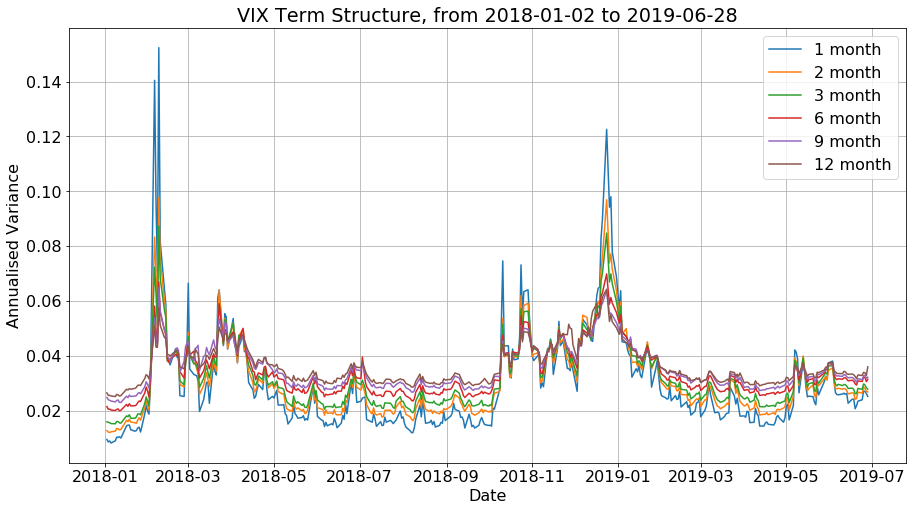

In [5]:
row_ind = VIX_TS[VIX_TS['DATE']>datetime.datetime(2018,1,1)].index
DATE = VIX_TS.iloc[row_ind,0]

plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 16})

for c_ind in range(1,7):
    LAB = VIX_TS.columns[c_ind]
    Y = VIX_TS.iloc[row_ind,c_ind]
    
    plt.plot(DATE,Y,label = LAB)
    
    
plt.legend()
plt.ylabel('Annualised Variance')
plt.xlabel('Date')
plt.title('VIX Term Structure, from ' + str(min(DATE).date()) + ' to ' + str(max(DATE).date()))
plt.grid()
plt.show()

### VIX Future Returns

Daily returns of a constant maturity VIX future strategy with target maturity of k months, retunrns are in percent.

In [7]:
VIX_FUT = pd.read_csv(DATA_PATH + 'VIX_FUT_RET.csv',skiprows=5)

VIX_FUT = VIX_FUT.rename({'Date':'DATE','r_1^{VIX fut.}':'1 month','r_2^{VIX fut.}':'2 month','r_3^{VIX fut.}':'3 month',
                         'r_4^{VIX fut.}':'4 month','r_5^{VIX fut.}':'5 month','r_6^{VIX fut.}':'6 month'},axis=1)

VIX_FUT.isna().sum() #checks for NA values

DATE       0
1 month    0
2 month    0
3 month    0
4 month    0
5 month    0
6 month    0
dtype: int64

In [8]:
VIX_FUT['DATE'] = VIX_FUT['DATE'].apply(DATE_STR)
VIX_FUT['DATE'] = pd.to_datetime(VIX_FUT['DATE'],format = '%d/%m/%Y')

print('Date Range:')
print('Start:',min(VIX_FUT.DATE).date())
print('End:',max(VIX_FUT.DATE).date())

Date Range:
Start: 2004-03-29
End: 2017-12-29


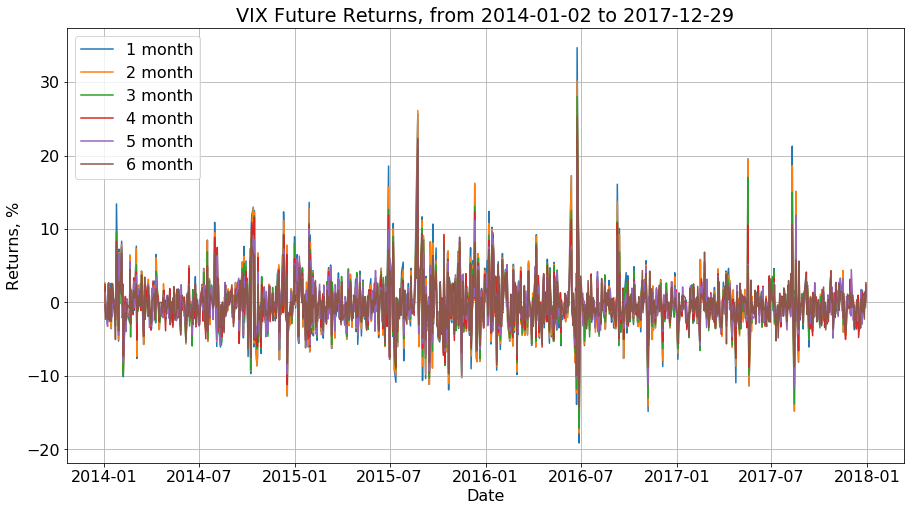

In [9]:
row_ind = VIX_FUT[VIX_FUT['DATE']>datetime.datetime(2014,1,1)].index
DATE = VIX_FUT.iloc[row_ind,0]

plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 16})

for c_ind in range(1,7):
    LAB = VIX_FUT.columns[c_ind]
    Y = VIX_FUT.iloc[row_ind,c_ind]
    
    plt.plot(DATE,Y,label = LAB)
    
    
plt.legend()
plt.ylabel('Returns, %')
plt.xlabel('Date')
plt.title('VIX Future Returns, from ' + str(min(DATE).date()) + ' to ' + str(max(DATE).date()))
plt.grid()
plt.show()

### S&P500 Variance Swap Returns

Columns are the constant-maturity variance swap with target maturity of K months. Returns are in percent.

In [11]:
VAR_SWAPS = pd.read_csv(DATA_PATH + 'VAR_SWAP_RET.csv',skiprows=5)

VAR_SWAPS = VAR_SWAPS.rename({'Date':'DATE','r_1^{var. swap}':'1 month','r_2^{var. swap}':'2 month','r_3^{var. swap}':'3 month',
                         'r_6^{var. swap}':'6 month','r_9^{var. swap}':'9 month','r_12^{var. swap}':'12 month'},axis=1)

VAR_SWAPS.isna().sum() #checks for NA values

DATE        0
1 month     0
2 month     0
3 month     0
6 month     0
9 month     0
12 month    0
dtype: int64

In [12]:
VAR_SWAPS['DATE'] = VAR_SWAPS['DATE'].apply(DATE_STR)
VAR_SWAPS['DATE'] = pd.to_datetime(VAR_SWAPS['DATE'],format = '%d/%m/%Y')

print('Date Range:')
print('Start:',min(VAR_SWAPS.DATE).date())
print('End:',max(VAR_SWAPS.DATE).date())

Date Range:
Start: 1996-01-05
End: 2019-06-27


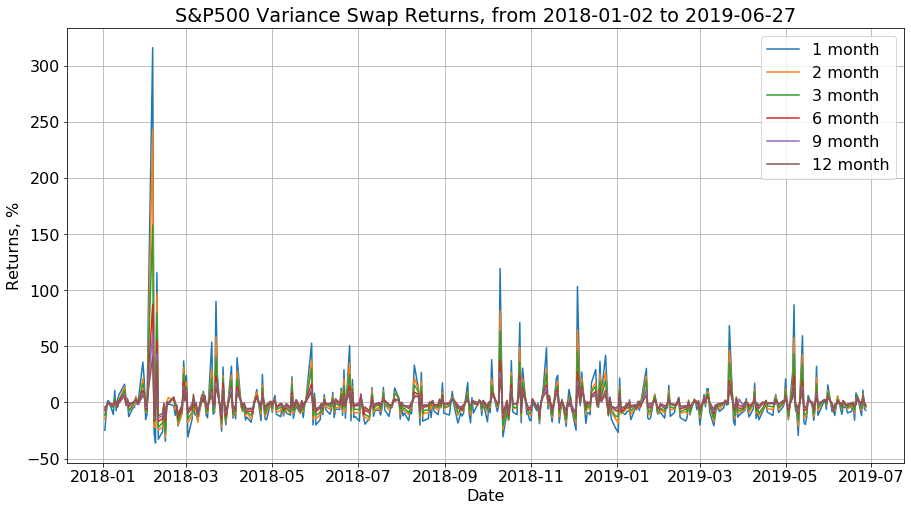

In [13]:
row_ind = VAR_SWAPS[VAR_SWAPS['DATE']>datetime.datetime(2018,1,1)].index
DATE = VAR_SWAPS.iloc[row_ind,0]

plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 16})

for c_ind in range(1,7):
    LAB = VAR_SWAPS.columns[c_ind]
    Y = VAR_SWAPS.iloc[row_ind,c_ind]
    
    plt.plot(DATE,Y,label = LAB)
    
    
plt.legend()
plt.ylabel('Returns, %')
plt.xlabel('Date')
plt.title('S&P500 Variance Swap Returns, from ' + str(min(DATE).date()) + ' to ' + str(max(DATE).date()))
plt.grid()
plt.show()

### S&P500 Straddle Returns

Daily retruns of a long or short, constant maturity, at the money, straddle strategy with target maturity of k months. For the short strategy, assume margin requirments equal to 20% of the current S&P500 index level. Returns are in percent.

In [14]:
STRADDLE = pd.read_csv(DATA_PATH + 'STRADDLE_RET.csv',skiprows=6)

STRADDLE = STRADDLE.rename({'Date':'DATE',
                            'r_1^{straddle}':'1 month Long','r_2^{straddle}':'2 month Long','r_3^{straddle}':'3 month Long',
                            'r_6^{straddle}':'6 month Long','r_9^{straddle}':'9 month Long','r_12^{straddle}':'12 month Long',
                            'r_1^{short straddle}':'1 month Short','r_2^{short straddle}':'2 month Short','r_3^{short straddle}':'3 month Short',
                            'r_6^{short straddle}':'6 month Short','r_9^{short straddle}':'9 month Short','r_12^{short straddle}':'12 month Short',},axis=1)

STRADDLE.isna().sum() #checks for NA values

DATE              0
1 month Long      0
2 month Long      0
3 month Long      0
6 month Long      0
9 month Long      0
12 month Long     0
1 month Short     0
2 month Short     0
3 month Short     0
6 month Short     0
9 month Short     0
12 month Short    0
dtype: int64

In [15]:
STRADDLE['DATE'] = STRADDLE['DATE'].apply(DATE_STR)
STRADDLE['DATE'] = pd.to_datetime(STRADDLE['DATE'],format = '%d/%m/%Y')

print('Date Range:')
print('Start:',min(STRADDLE.DATE).date())
print('End:',max(STRADDLE.DATE).date())

Date Range:
Start: 1996-01-05
End: 2019-06-28


###### Long Positions

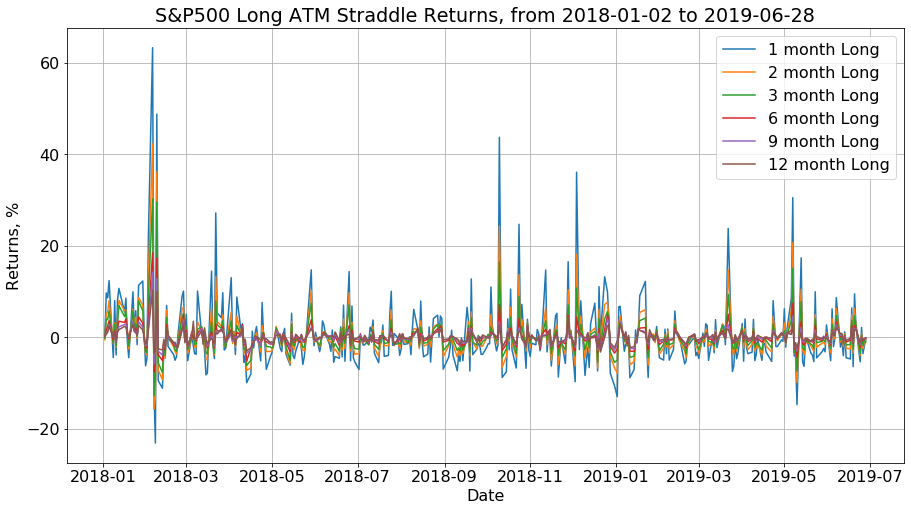

In [16]:
row_ind = STRADDLE[STRADDLE['DATE']>datetime.datetime(2018,1,1)].index
DATE = STRADDLE.iloc[row_ind,0]

plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 16})

for c_ind in range(1,7):
    LAB = STRADDLE.columns[c_ind]
    Y = STRADDLE.iloc[row_ind,c_ind]
    
    plt.plot(DATE,Y,label = LAB)
    
    
plt.legend()
plt.ylabel('Returns, %')
plt.xlabel('Date')
plt.title('S&P500 Long ATM Straddle Returns, from ' + str(min(DATE).date()) + ' to ' + str(max(DATE).date()))
plt.grid()
plt.show()

###### Short Positions

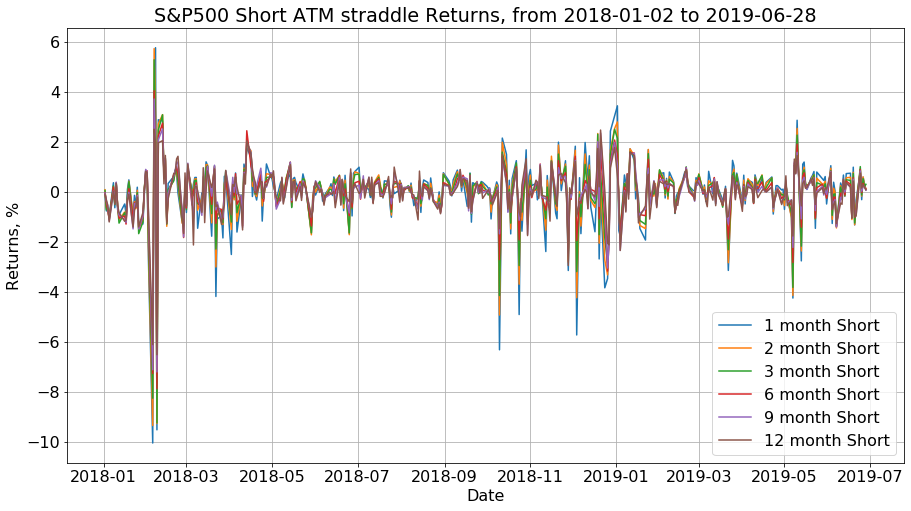

In [17]:
row_ind = STRADDLE[STRADDLE['DATE']>datetime.datetime(2018,1,1)].index
DATE = STRADDLE.iloc[row_ind,0]

plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 16})

for c_ind in range(7,13):
    LAB = STRADDLE.columns[c_ind]
    Y = STRADDLE.iloc[row_ind,c_ind]
    
    plt.plot(DATE,Y,label = LAB)
    
    
plt.legend()
plt.ylabel('Returns, %')
plt.xlabel('Date')
plt.title('S&P500 Short ATM straddle Returns, from ' + str(min(DATE).date()) + ' to ' + str(max(DATE).date()))
plt.grid()
plt.show()

### Principal Components

PCA of the VIX Term Structure Data. The PCs are standardized to have mean 0 and standard deviation of 1.

In [18]:
PCA = pd.read_csv(DATA_PATH + 'PCA.csv',skiprows=list(range(0,4)) + list(range(11,6000)))
PCA = PCA.drop(labels = ['Unnamed: 0'],axis=1)

PCA = PCA.rename({0:'1 month',1:'2 month',2:'3 month',3:'6 month',4:'9 month',5:'12 month'})
PCA

,PC1,PC2,PC3,PC4,PC5,PC6
1 month,0.51968,-0.56870,-0.55366,0.16303,0.03370,-0.26881
2 month,0.47462,-0.24053,0.24564,-0.26279,0.03584,0.76563
3 month,0.43583,-0.01249,0.60790,-0.32293,-0.00583,-0.57969
6 month,0.36150,0.29878,0.15584,0.65321,-0.56929,0.07062
9 month,0.31765,0.44323,-0.02943,0.30580,0.77965,0.02023
12 month,0.28832,0.57693,-0.48829,-0.52905,-0.25611,-0.01042


In [19]:
PC = pd.read_csv(DATA_PATH + 'PCA.csv',skiprows=12)
PC = PC.drop(labels=['Unnamed: 7'],axis=1)
PC = PC.rename({'Unnamed: 0':'DATE'},axis=1)

PC.isna().sum() #checks for NA values

DATE    0
PC1     0
PC2     0
PC3     0
PC4     0
PC5     0
PC6     0
dtype: int64

In [20]:
PC['DATE'] = PC['DATE'].apply(DATE_STR)
PC['DATE'] = pd.to_datetime(PC['DATE'],format = '%d/%m/%Y')

print('Date Range:')
print('Start:',min(PC.DATE).date())
print('End:',max(PC.DATE).date())

Date Range:
Start: 1996-01-04
End: 2019-06-28


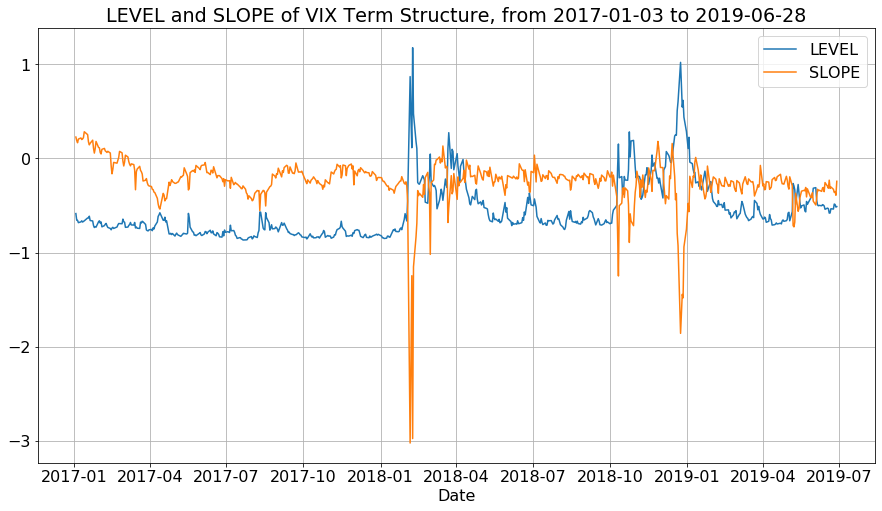

In [21]:
LEVEL = PC['PC1']
SLOPE = PC['PC2']

row_ind = PC[PC['DATE']>datetime.datetime(2017,1,1)].index
DATE = PC.iloc[row_ind,0]

plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 16})

Y1 = LEVEL[row_ind]
Y2 = SLOPE[row_ind]
    
plt.plot(DATE,Y1,label = 'LEVEL')
plt.plot(DATE,Y2,label = 'SLOPE')
    
    
plt.legend()
plt.ylabel('')
plt.xlabel('Date')
plt.title('LEVEL and SLOPE of VIX Term Structure, from ' + str(min(DATE).date()) + ' to ' + str(max(DATE).date()))
plt.grid()
plt.show()